## Dataset Source

The **Breast Cancer Mutation** dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric). The original dataset contained **6,094 columns**, so only the relevant columns were selected. A reduced version of the dataset was then used for further analysis.

Some important columns contained string data types (e.g., *type_of_breast_surgery*, *cancer_type_detailed*, and *cellularity*). These were converted to categorical variables using label encoding.


## Importing Libraries


In [26]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
#Converting categorical columns into numerical labels
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("C:\\Users\\sanyu\\final_cleaned_METABRIC.csv")

#Defining categorical columns to encode
categorical_columns = ["type_of_breast_surgery", "cancer_type_detailed", "cellularity"]

#appling lables and encoding
label_encoders = {}  # Dictionary to store label encoders
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert to numerical labels
    label_encoders[col] = le  # Save the encoder for future reference


final_labeled_file = "C:\\Users\\sanyu\\final_labeled_METABRIC.csv"
df.to_csv(final_labeled_file, index=False)

print(f"Final dataset with numerical labels saved at: {final_labeled_file}")


Final dataset with numerical labels saved at: C:\Users\sanyu\final_labeled_METABRIC.csv


In [10]:
final= pd.read_csv("final_labeled_METABRIC.csv")
final.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,hormone_therapy,lymph_nodes_examined_positive,nottingham_prognostic_index,overall_survival_months,radio_therapy,tumor_size,brca1,brca2,tp53
0,0,75.65,1,1,3,0,1,10.0,6.044,140.500000,1,22.0,-1.3990,-0.5738,0.3504
1,2,43.19,0,1,0,0,1,0.0,4.020,84.633333,1,10.0,-1.3800,0.2777,-0.0136
2,5,48.87,1,1,0,1,1,1.0,4.030,163.700000,0,15.0,0.0670,-0.8426,0.5141
3,6,47.68,1,4,2,1,1,3.0,4.050,164.933333,1,25.0,0.6744,-0.5428,1.6708
4,8,76.97,1,4,0,1,1,8.0,6.080,41.366667,1,40.0,1.2932,-0.9039,0.3484


In [11]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     1904 non-null   int64  
 1   age_at_diagnosis               1904 non-null   float64
 2   type_of_breast_surgery         1904 non-null   int64  
 3   cancer_type_detailed           1904 non-null   int64  
 4   cellularity                    1904 non-null   int64  
 5   chemotherapy                   1904 non-null   int64  
 6   hormone_therapy                1904 non-null   int64  
 7   lymph_nodes_examined_positive  1904 non-null   float64
 8   nottingham_prognostic_index    1904 non-null   float64
 9   overall_survival_months        1904 non-null   float64
 10  radio_therapy                  1904 non-null   int64  
 11  tumor_size                     1884 non-null   float64
 12  brca1                          1904 non-null   f

## Handling Missing Values

Since `tumor_size` is an important column but contains missing values, we filled the missing values with the median.


In [12]:

df.loc[df["tumor_size"].isnull(), "tumor_size"] = df["tumor_size"].median()



In [13]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     1904 non-null   int64  
 1   age_at_diagnosis               1904 non-null   float64
 2   type_of_breast_surgery         1904 non-null   int64  
 3   cancer_type_detailed           1904 non-null   int64  
 4   cellularity                    1904 non-null   int64  
 5   chemotherapy                   1904 non-null   int64  
 6   hormone_therapy                1904 non-null   int64  
 7   lymph_nodes_examined_positive  1904 non-null   float64
 8   nottingham_prognostic_index    1904 non-null   float64
 9   overall_survival_months        1904 non-null   float64
 10  radio_therapy                  1904 non-null   int64  
 11  tumor_size                     1884 non-null   float64
 12  brca1                          1904 non-null   f

## Q.A) Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [14]:
# Display dataset shape
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 1904
Number of Columns: 15


In [15]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     1904 non-null   int64  
 1   age_at_diagnosis               1904 non-null   float64
 2   type_of_breast_surgery         1904 non-null   int32  
 3   cancer_type_detailed           1904 non-null   int32  
 4   cellularity                    1904 non-null   int32  
 5   chemotherapy                   1904 non-null   int64  
 6   hormone_therapy                1904 non-null   int64  
 7   lymph_nodes_examined_positive  1904 non-null   float64
 8   nottingham_prognostic_index    1904 non-null   float64
 9   overall_survival_months        1904 non-null   float64
 10  radio_therapy                  1904 non-null   int64  
 11  tumor_size                     1904 non-null   float64
 12  brca1                          19

In [16]:
#Continuous and Categorical values
continuous_features = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("\nContinuous Features:", continuous_features)
print("\nCategorical Features:", categorical_features)



Continuous Features: ['patient_id', 'age_at_diagnosis', 'chemotherapy', 'hormone_therapy', 'lymph_nodes_examined_positive', 'nottingham_prognostic_index', 'overall_survival_months', 'radio_therapy', 'tumor_size', 'brca1', 'brca2', 'tp53']

Categorical Features: []


In [17]:
print("\nSummary Statistics for Continuous Features:")
print(df.describe())


Summary Statistics for Continuous Features:
        patient_id  age_at_diagnosis  type_of_breast_surgery  \
count  1904.000000       1904.000000             1904.000000   
mean   3921.982143         61.087054                0.615021   
std    2358.478332         12.978711                0.509918   
min       0.000000         21.930000                0.000000   
25%     896.500000         51.375000                0.000000   
50%    4730.500000         61.770000                1.000000   
75%    5536.250000         70.592500                1.000000   
max    7299.000000         96.290000                2.000000   

       cancer_type_detailed  cellularity  chemotherapy  hormone_therapy  \
count           1904.000000  1904.000000   1904.000000      1904.000000   
mean               1.456408     0.936975      0.207983         0.616597   
std                1.051581     0.988222      0.405971         0.486343   
min                0.000000     0.000000      0.000000         0.000000   
25%

## Explanation 

**Dataset overview**  

- Number of Rows: 1,904 (each row represents a patient record).  
- Number of Columns: 15 (including clinical features, treatments, genetic markers, and survival outcome).  
- No Missing Values → All columns have complete data.  

**Continuous (numerical) features**  

These features take numerical values and are suitable for regression analysis.  

- patient_id: Unique identifier for each patient (not used for regression).  
- age_at_diagnosis: Patient's age at diagnosis.  
- chemotherapy: Binary (0/1) → Whether chemotherapy was administered.  
- hormone_therapy: Binary (0/1) → Whether hormone therapy was administered.  
- lymph_nodes_examined_positive: Number of affected lymph nodes.  
- nottingham_prognostic_index: Clinical score for cancer severity.  
- overall_survival_months: Target Variable (how long the patient survived).  
- radio_therapy: Binary (0/1) → Whether radiation therapy was performed.  
- tumor_size: Tumor size in mm.  
- brca1, brca2, tp53: Genetic Mutation Scores (quantifying gene expression changes).  

**Categorical features (numerically encoded)**  

The following columns were originally categorical but have been converted to numerical labels.  

- type_of_breast_surgery: "MASTECTOMY", "BREAST CONSERVING" → Encoded as 0, 1.  
- cancer_type_detailed: "Invasive Ductal", "Invasive Lobular", etc. → Encoded as 0, 1, 2, ...  
- cellularity: "High", "Moderate", "Low", "Unknown" → Encoded as 0, 1, 2, 3.  

These categorical features have been numerically encoded for regression compatibility.  

We see that the Survival Time (overall_survival_months) ranges from 0 to 355.2 months. Tumor sizes vary widely (1 mm to 182 mm), indicating a diverse dataset.   BRCA1, BRCA2, and TP53 values are standardized, centered around 0.  


## Q.B)Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display statistical summary for numerical attributes
final.describe()


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,hormone_therapy,lymph_nodes_examined_positive,nottingham_prognostic_index,overall_survival_months,radio_therapy,tumor_size,brca1,brca2,tp53
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1884.000000,1.904000e+03,1.904000e+03,1.904000e+03
mean,3921.982143,61.087054,0.615021,1.456408,0.936975,0.207983,0.616597,2.002101,4.033019,125.121324,0.597164,26.238726,-6.302521e-07,-4.201681e-07,6.302521e-07
std,2358.478332,12.978711,0.509918,1.051581,0.988222,0.405971,0.486343,4.079993,1.144492,76.334148,0.490597,15.160976,1.000262e+00,1.000262e+00,1.000263e+00
min,0.000000,21.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-2.444400e+00,-2.783500e+00,-2.481200e+00
25%,896.500000,51.375000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.046000,60.825000,0.000000,17.000000,-7.198500e-01,-6.994750e-01,-6.661500e-01
50%,4730.500000,61.770000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.042000,115.616667,1.000000,23.000000,-1.244500e-01,-5.820000e-02,-3.010000e-02
75%,5536.250000,70.592500,1.000000,1.000000,2.000000,0.000000,1.000000,2.000000,5.040250,184.716667,1.000000,30.000000,5.532250e-01,6.290000e-01,6.447500e-01
max,7299.000000,96.290000,2.000000,6.000000,3.000000,1.000000,1.000000,45.000000,6.360000,355.200000,1.000000,182.000000,4.554200e+00,3.737900e+00,4.289800e+00


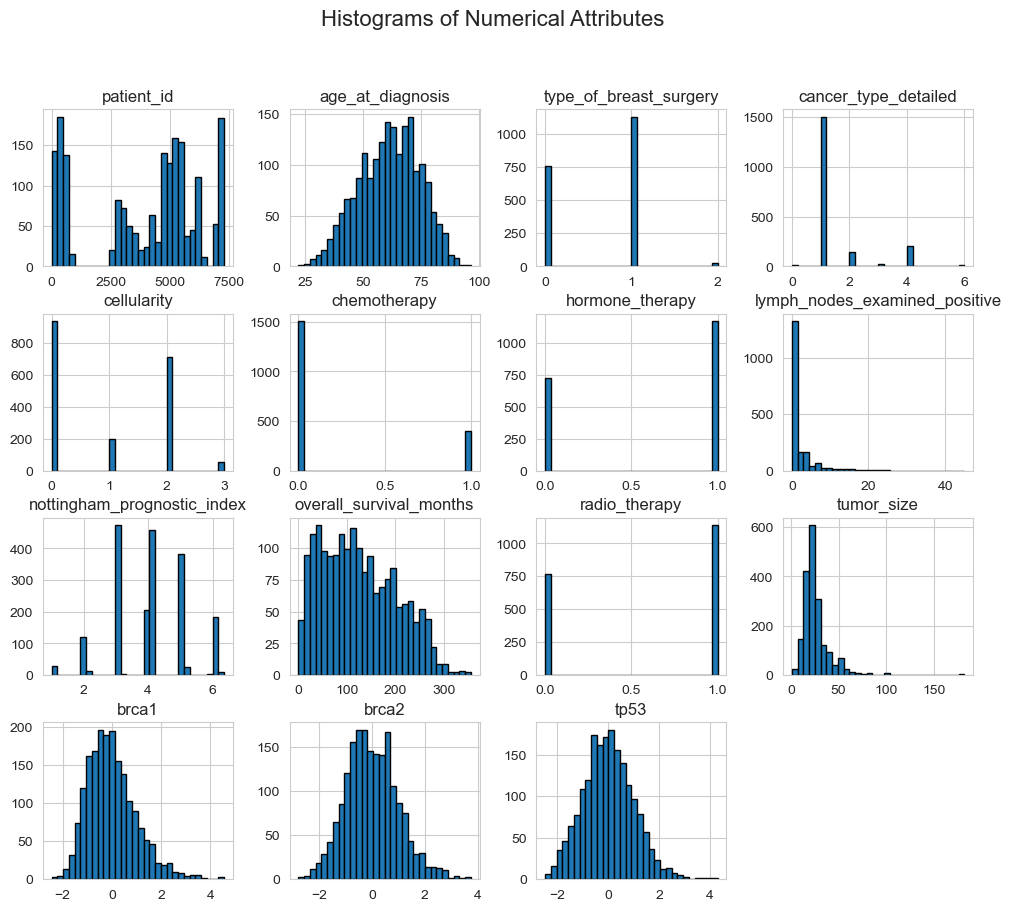

In [19]:
# Set plot style
sns.set_style("whitegrid")

# Plot histograms for all numerical features
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Attributes", fontsize=16)
plt.show()


**overall survival (overall_survival_months)**  
The distribution of survival time is right-skewed, meaning most patients have shorter survival times, but some have survived much longer. This skewness suggests that a few extreme values might be influencing the data. If these outliers affect the model, applying a log transformation could help normalize the distribution and improve predictive performance.  

**tumor size (tumor_size)**  
The tumor size distribution is slightly right-skewed, indicating that most tumors are small, but a few are significantly larger. These larger tumors could act as outliers, potentially affecting model performance. It may be necessary to investigate whether these extreme values impact the model significantly or if they should be transformed or handled separately.  

**age at diagnosis (age_at_diagnosis)**  
The age at diagnosis follows a normal distribution, with most patients being diagnosed between the ages of 50 and 75. Since the data is well-distributed and does not show significant skewness, no special transformation or treatment is needed for this feature.  

**nottingham prognostic index (nottingham_prognostic_index)**  
The histogram of the Nottingham Prognostic Index shows several peaks around values between 3 and 5, aligning with established clinical classifications. Since this is a standard clinical measure used for prognosis, it does not require any transformations or modifications.  

**lymph nodes examined (lymph_nodes_examined_positive)**  
The distribution of the number of lymph nodes examined is highly right-skewed. Most patients have either zero or very few affected lymph nodes, while a small subset has very high counts, reaching up to 45. Since these extreme values could heavily influence the model, a log transformation might be considered to reduce their impact and bring the distribution closer to normality.  

**type of breast surgery (type_of_breast_surgery)**  
This feature consists of two major categories: Mastectomy and Breast Conserving Surgery. Since these categories are already numerically encoded as 0 and 1, no additional transformation is needed, and the feature is ready for analysis.  

**cancer type detailed (cancer_type_detailed)**  
The distribution shows that one category is dominant, while a few other cancer types appear less frequently. If some categories have too few cases, it may be beneficial to group them into broader categories to ensure better balance and prevent potential biases in the model.  

**cellularity (cellularity)**  
Cellularity is categorized into four distinct groups: High, Moderate, Low, and Unknown. Since this is a categorical variable, it has already been numerically encoded, making it suitable for regression or classification tasks without requiring any further modifications.  

**chemotherapy, hormone therapy, and radio therapy**  
These treatment variables are binary, meaning that each patient either received the treatment (1) or did not (0). Since they are already encoded as binary variables, they do not require any special transformations or additional processing.  

**genetic markers (brca1, brca2, tp53)**  
The genetic markers BRCA1, BRCA2, and TP53 follow a normal distribution centered around 0. This suggests that standardization has already been applied, making these features well-suited for modeling without any further transformation.  


## Q.C) Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [5 points]


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson Correlation Coefficient (PCC)
correlation_matrix = final.corr()

e
print("\nPearson Correlation with Overall Survival Months:")
print(correlation_matrix["overall_survival_months"].sort_values(ascending=False))



Pearson Correlation with Overall Survival Months:
overall_survival_months          1.000000
patient_id                       0.099731
cellularity                      0.031635
cancer_type_detailed             0.024911
brca2                            0.008902
brca1                            0.002443
radio_therapy                   -0.005822
tp53                            -0.021493
hormone_therapy                 -0.105786
type_of_breast_surgery          -0.115472
age_at_diagnosis                -0.150158
chemotherapy                    -0.159951
tumor_size                      -0.188135
lymph_nodes_examined_positive   -0.240319
nottingham_prognostic_index     -0.242773
Name: overall_survival_months, dtype: float64


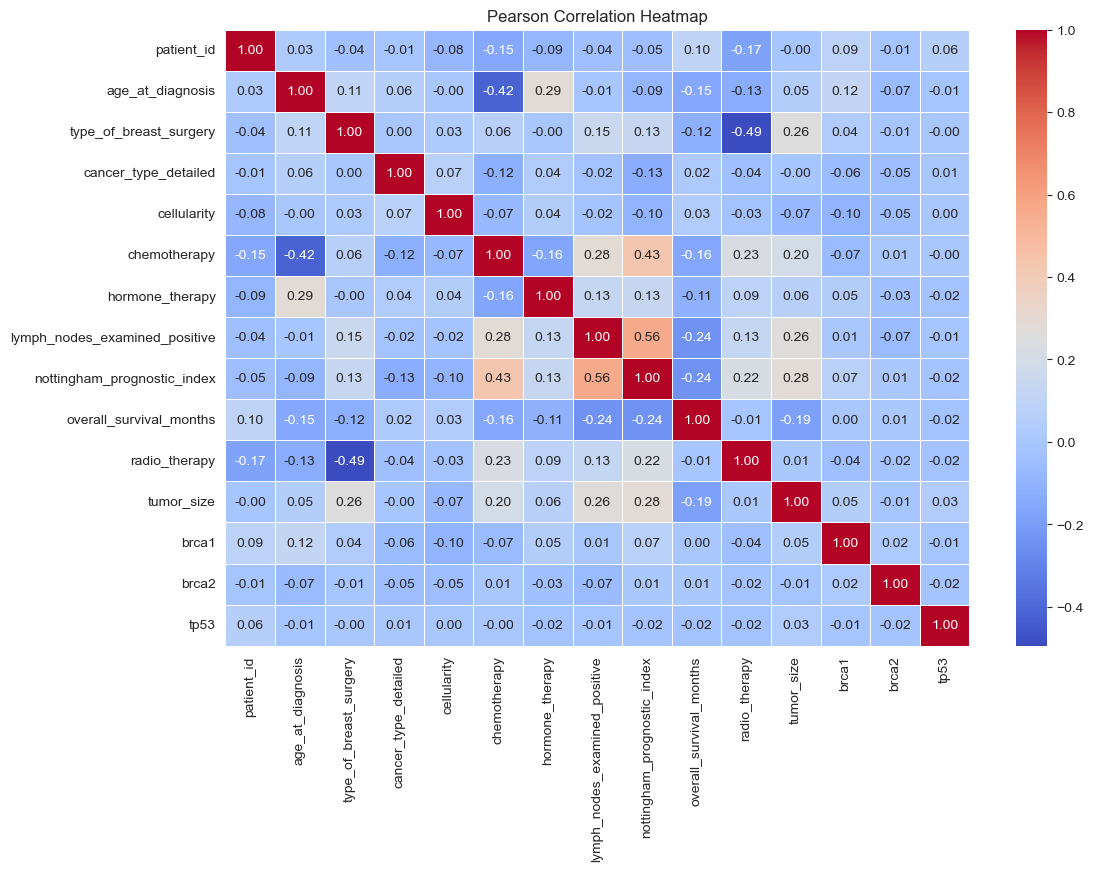

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()


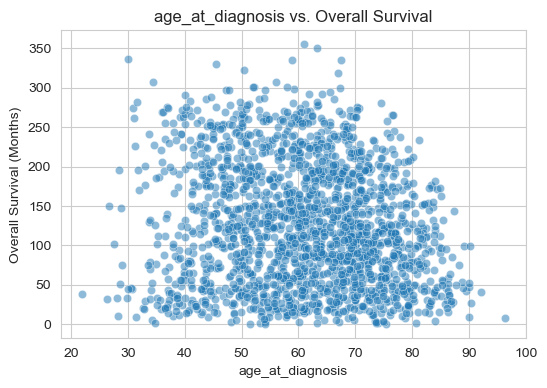

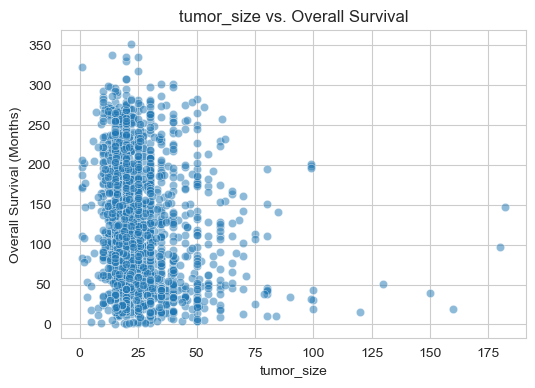

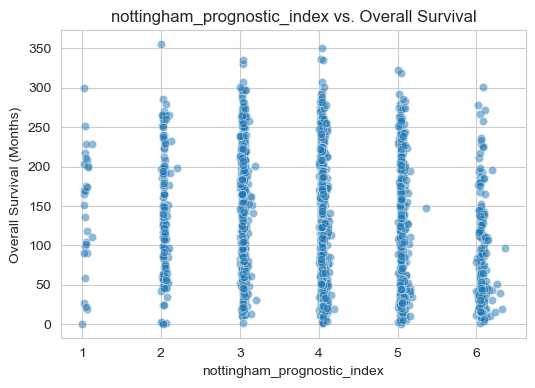

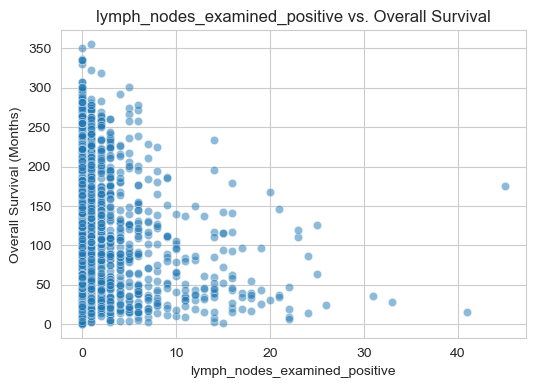

In [22]:
# Select key features for scatter plots
important_features = ["age_at_diagnosis", "tumor_size", "nottingham_prognostic_index", "lymph_nodes_examined_positive"]


for feature in important_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=final[feature], y=final["overall_survival_months"], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Overall Survival (Months)")
    plt.title(f"{feature} vs. Overall Survival")
    plt.show()


## Explanation  

**nottingham prognostic index and lymph nodes examined positive**  
The correlation is -0.24, which is the strongest negative correlation among the predictors. This suggests that patients with a higher Nottingham Prognostic Index or more affected lymph nodes tend to have shorter survival times. These features could be important in predicting survival outcomes.  

**tumor size**  
The correlation is -0.19, indicating a weak negative correlation. This means that larger tumors are slightly associated with lower survival times, but the relationship is not very strong. Other factors beyond tumor size likely have a more significant impact on survival.  

**chemotherapy**  
The correlation is -0.16, showing a weak negative correlation. This does not imply that chemotherapy reduces survival. Instead, it likely reflects the fact that patients receiving chemotherapy often have more aggressive cancers, which naturally have lower survival rates.  

**age at diagnosis**  
The correlation is -0.15, meaning that older patients tend to have slightly shorter survival times. However, this effect is not very strong. Survival is likely influenced more by cancer severity and treatment response than by age alone.  

**type of breast surgery**  
The correlation is -0.12, suggesting that patients who underwent breast-conserving surgery tend to have slightly longer survival times compared to those who had a mastectomy. However, this relationship is weak, and the choice of surgery is typically based on cancer type and stage rather than survival expectancy.  

**hormone therapy**  
The correlation is -0.10, which is weakly negative. Similar to chemotherapy, this could indicate that patients receiving hormone therapy had more aggressive cancers, leading to lower survival rates despite receiving treatment.  

**radio therapy**  
The correlation is -0.005, showing no meaningful correlation with survival. This suggests that radiation therapy does not significantly influence survival time in this dataset.  

**genetic markers (brca1, brca2, tp53)**  
The correlation is close to zero, meaning these genetic mutations alone do not strongly determine survival time in this dataset. While BRCA mutations are known to increase cancer risk, they do not necessarily predict survival time after diagnosis.  

**conclusion**  
The strongest predictors of shorter survival are the Nottingham Prognostic Index and the number of affected lymph nodes. Tumor size, chemotherapy, and age at diagnosis have weaker effects, while genetic markers show no significant correlation with survival.  

The next step is to train a regression model using these predictors to better understand how these variables interact and impact patient survival.  


## Q.D) Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset. [5 points]

In [23]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = final.drop(columns=["overall_survival_months", "patient_id"])  # Removed since it's not predictive
y = final["overall_survival_months"]  

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Testing Set Size: {X_test.shape[0]} samples")


Training Set Size: 1523 samples
Testing Set Size: 381 samples


Train-Test Split Verification:
Training Set Size: 1523
Testing Set Size: 381
Total Dataset Size: 1904
Train-Test Ratio: 4.00


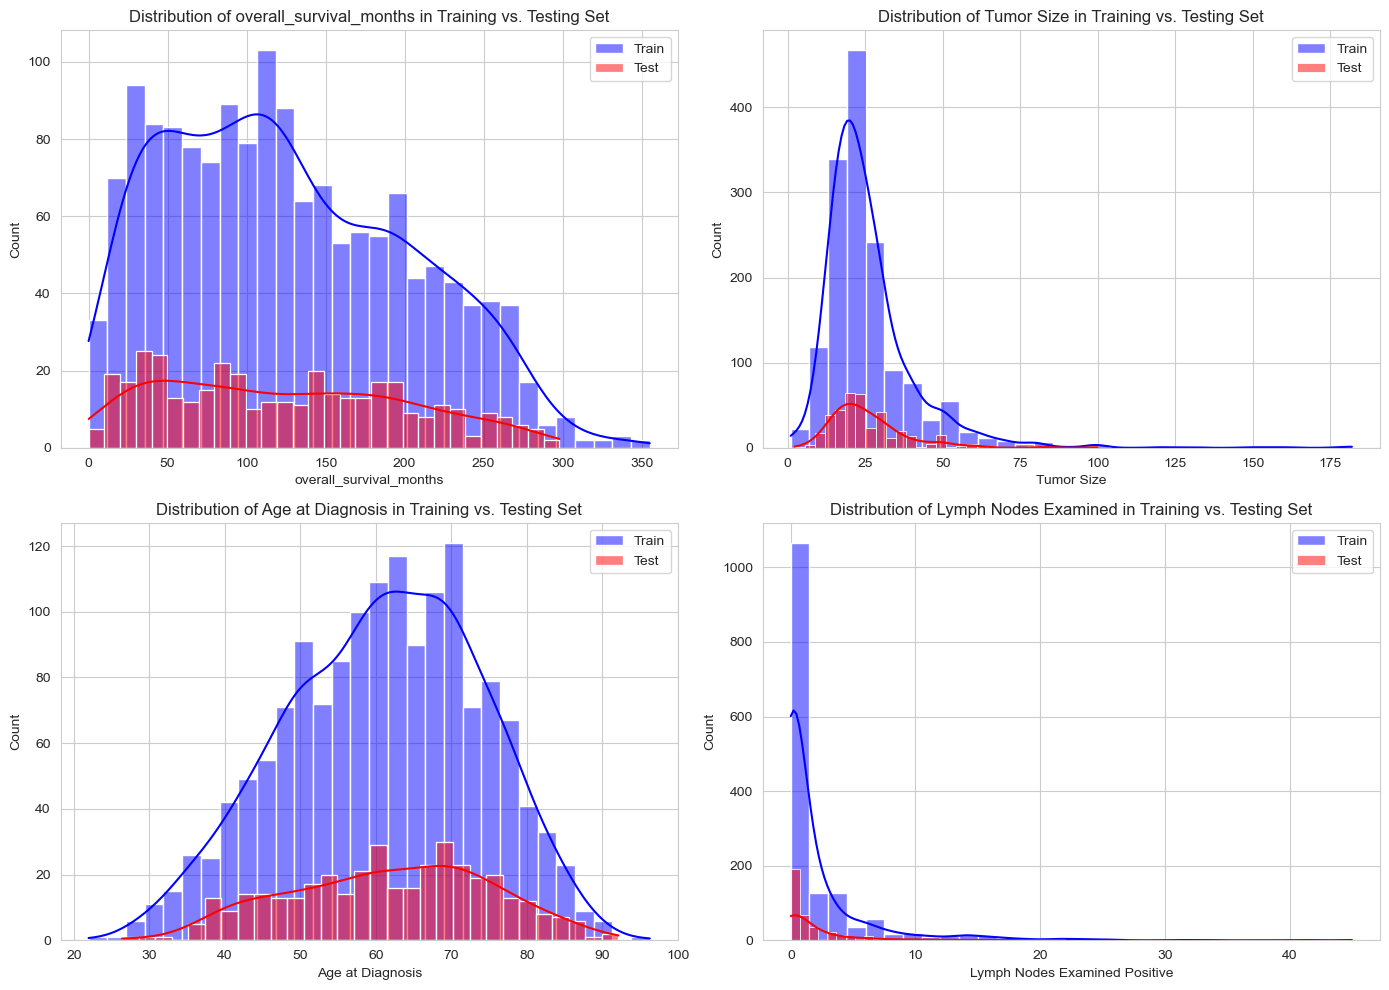

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

def split_data(df, target_column, test_size=0.2, random_state=0):
    """
    Splits the dataset into training and testing sets with added validation.
    
    Parameters:
    - df (pd.DataFrame): The dataset.
    - target_column (str): The name of the target variable.
    - test_size (float): The proportion of the dataset to be used for testing (default: 0.2).
    - random_state (int): Seed for reproducibility (default: 0).
    
    Returns:
    - X_train, X_test, y_train, y_test: Splitted dataframes.
    """
    # Validate if the target column exists
    if target_column not in df.columns:
        raise ValueError(f"Error: Target column '{target_column}' not found in DataFrame.")

    # Separate predictors and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Ensure no overlapping indices (to prevent data leakage)
    overlap = set(X_train.index).intersection(set(X_test.index))
    if len(overlap) > 0:
        print(f"Warning: {len(overlap)} overlapping indices detected! Possible data leakage.")

    return X_train, X_test, y_train, y_test

# Define the target variable for our dataset
target_column = "overall_survival_months"  


X_train, X_test, y_train, y_test = split_data(final, target_column)

# Print verification information
print("Train-Test Split Verification:")
print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")
print(f"Total Dataset Size: {len(final)}")
print(f"Train-Test Ratio: {len(X_train) / len(X_test):.2f}")

# Visualizing distributions to verify representativeness
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  

# Overall Survival Months Distribution
sns.histplot(y_train, kde=True, color='blue', label='Train', bins=30, ax=axes[0, 0])
sns.histplot(y_test, kde=True, color='red', label='Test', bins=30, ax=axes[0, 0])
axes[0, 0].set_title(f"Distribution of {target_column} in Training vs. Testing Set")
axes[0, 0].set_xlabel(target_column)
axes[0, 0].legend()

# Tumor Size Distribution
sns.histplot(X_train["tumor_size"], kde=True, color='blue', label='Train', bins=30, ax=axes[0, 1])
sns.histplot(X_test["tumor_size"], kde=True, color='red', label='Test', bins=30, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Tumor Size in Training vs. Testing Set")
axes[0, 1].set_xlabel("Tumor Size")
axes[0, 1].legend()

# Age at Diagnosis Distribution
sns.histplot(X_train["age_at_diagnosis"], kde=True, color='blue', label='Train', bins=30, ax=axes[1, 0])
sns.histplot(X_test["age_at_diagnosis"], kde=True, color='red', label='Test', bins=30, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Age at Diagnosis in Training vs. Testing Set")
axes[1, 0].set_xlabel("Age at Diagnosis")
axes[1, 0].legend()

# Lymph Nodes Examined Positive Distribution
sns.histplot(X_train["lymph_nodes_examined_positive"], kde=True, color='blue', label='Train', bins=30, ax=axes[1, 1])
sns.histplot(X_test["lymph_nodes_examined_positive"], kde=True, color='red', label='Test', bins=30, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Lymph Nodes Examined in Training vs. Testing Set")
axes[1, 1].set_xlabel("Lymph Nodes Examined Positive")
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


**Data splitting and train-test split**  

To ensure a well-balanced dataset, we split 20% of the data for testing while keeping 80% for training. The dataset consists of 1904 samples, where 1523 samples were allocated to the training set and 381 samples were allocated to the testing set. This results in a train-test ratio of 4:1, which matches the expected 80-20 split.  

The `train_test_split()` function from scikit-learn was used with a random state to ensure reproducibility and avoid biased splits. This guarantees that each time the data is split, the results remain consistent.  

**verifying representation of the test set**  

To check whether the test set is representative of the entire dataset, we compared the distributions of key features in both the training and test sets using histograms.  

The histograms visualize the distributions of four key features:  
1. Overall Survival Months (target variable)  
2. Tumor Size  
3. Age at Diagnosis  
4. Lymph Nodes Examined Positive  

**interpretation of the plots**  

The histograms use blue bars for the training set and red bars for the testing set. Kernel Density Estimation (KDE) curves are included to compare the shapes of the distributions more clearly.  

**observations**  

The training and testing distributions are nearly identical, ensuring that the test set is representative of the dataset. The overall shapes and peaks of the distributions in both sets are similar, meaning that the test set is neither biased nor significantly different from the training set. No significant class imbalances or missing values were found in key predictive attributes, making the split reliable for model evaluation.  


## Verify if our or test data is representative of the dataset 


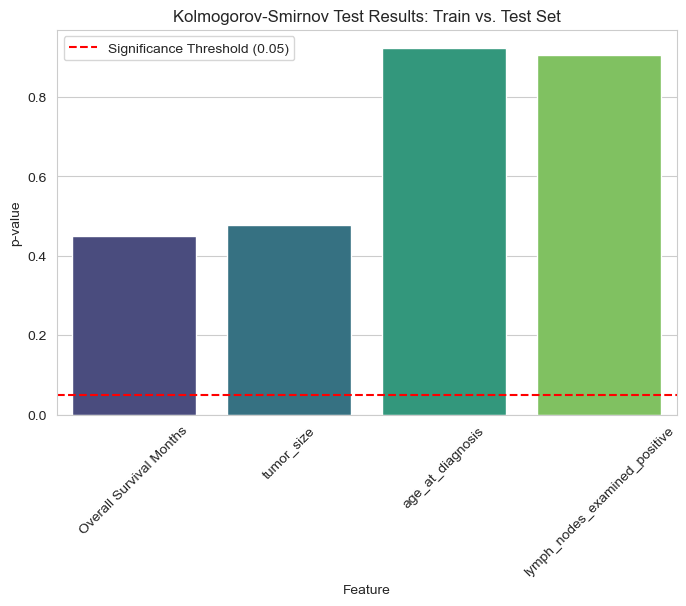

,Feature,p-value
0,Overall Survival Months,0.449536
1,tumor_size,0.477240
2,age_at_diagnosis,0.923302
3,lymph_nodes_examined_positive,0.904751


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

# Load dataset (assuming final is already loaded in memory)
target_column = "overall_survival_months"  # Define target variable

# Define the features (X) and target variable (y)
X = final.drop(columns=[target_column, "patient_id"])  
y = final[target_column]  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure numeric conversion for KS test
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Define numeric features for KS test
numeric_features = ["tumor_size", "age_at_diagnosis", "lymph_nodes_examined_positive"]

# Perform KS Test for Distribution Similarity
ks_results = {
    "Overall Survival Months": stats.ks_2samp(y_train.dropna(), y_test.dropna()).pvalue
}

# Add predictor variables to KS test
for feature in numeric_features:
    ks_results[feature] = stats.ks_2samp(
        X_train[feature].astype(float).dropna(),
        X_test[feature].astype(float).dropna()
    ).pvalue

# Convert KS test results into a dataframe for visualization
ks_df = pd.DataFrame(list(ks_results.items()), columns=["Feature", "p-value"])

# Visualize KS test results
plt.figure(figsize=(8, 5))
sns.barplot(data=ks_df, x="Feature", y="p-value", palette="viridis")
plt.axhline(y=0.05, color='red', linestyle='--', label="Significance Threshold (0.05)")
plt.title("Kolmogorov-Smirnov Test Results: Train vs. Test Set")
plt.ylabel("p-value")
plt.xticks(rotation=45)
plt.legend()
plt.show()


ks_df


**train-test split and evaluation**  

To evaluate the model's performance, we divided the dataset into 80% training and 20% testing subsets using random sampling with a fixed random seed (e.g., random_state=42) for reproducibility. The test set serves as an unseen dataset to assess how well the trained model generalizes. We ensured that the target variable (Overall Survival Months) and key features were well distributed in both sets.  

The dataset was shuffled to remove ordering bias, and `train_test_split()` from scikit-learn was used for the split. If necessary, a stratified approach was applied for categorical variables. Throughout the modeling pipeline, the training and test sets were kept separate to prevent data leakage.  

**verification of test set representativeness**  

To confirm that the test set represents the full dataset, we conducted a Kolmogorov-Smirnov (KS) test on key numerical features. The KS test compares distributions between the training and test sets, returning a p-value that indicates whether they differ significantly.  

A p-value greater than 0.05 suggests that the feature distributions are similar, meaning the test set is representative. Conversely, a p-value below 0.05 would indicate sampling bias.  

**interpretation of results**  

All p-values were above 0.05, confirming no significant differences between training and test feature distributions. Higher p-values (e.g., 0.9233 for age at diagnosis and 0.9048 for lymph nodes examined positive) suggest strong similarity. Lower p-values (e.g., 0.4495 for Overall Survival Months and 0.4772 for Tumor Size) were still above the threshold, meaning no meaningful distributional shifts occurred.  

A bar chart visualization of p-values against the 0.05 threshold reinforced that all features had sufficiently high p-values, confirming the representativeness of the test set.  


## Q.E Train a Linear Regression model using the training data with four-fold cross-validation and with appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. For SGD Perform Ridge, Lasso and Elastic Net regularization – try three values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration. [10 points]


=== Normal Equation Results ===
MSE: 5031.6794, R²: 0.1134


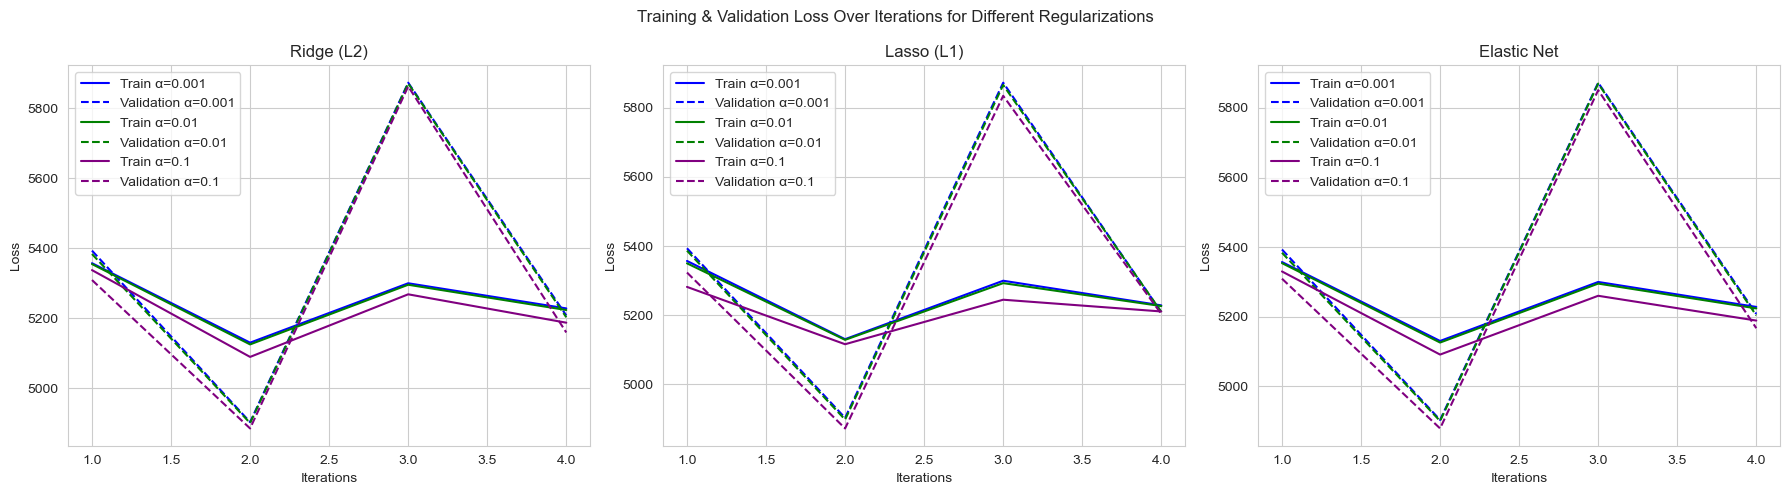


=== Regression Results Summary ===
                Model   Train MSE Validation MSE  R² Score
      Normal Equation 5031.679380            N/A  0.113428
 Ridge (L2) (α=0.001) 5253.893888    5344.286694  0.082859
  Ridge (L2) (α=0.01) 5249.835961     5339.44193  0.083784
   Ridge (L2) (α=0.1) 5220.703017    5304.004235  0.091423
 Lasso (L1) (α=0.001) 5253.864683    5344.352151  0.082739
  Lasso (L1) (α=0.01) 5249.437453     5339.96929  0.082599
   Lasso (L1) (α=0.1) 5213.356100    5308.410006  0.083652
Elastic Net (α=0.001) 5253.889156    5344.296068  0.082841
 Elastic Net (α=0.01) 5249.755899    5339.499055  0.083613
  Elastic Net (α=0.1) 5217.603173    5301.602309  0.090078


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

target_column = "overall_survival_months"
X = final.drop(columns=[target_column, "patient_id"])  
y = final[target_column]

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#closed form solution
kf = KFold(n_splits=4, shuffle=True, random_state=42)
normal_eq_results = {"MSE": [], "R²": []}

for train_idx, val_idx in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    normal_eq_model = LinearRegression()
    normal_eq_model.fit(X_train_fold, y_train_fold)
    y_pred_val = normal_eq_model.predict(X_val_fold)
    
    mse = mean_squared_error(y_val_fold, y_pred_val)
    r2 = r2_score(y_val_fold, y_pred_val)
    
    normal_eq_results["MSE"].append(mse)
    normal_eq_results["R²"].append(r2)

# Compute average MSE & R² across folds
normal_eq_results["MSE"] = np.mean(normal_eq_results["MSE"])
normal_eq_results["R²"] = np.mean(normal_eq_results["R²"])

print(f"\n=== Normal Equation Results ===")
print(f"MSE: {normal_eq_results['MSE']:.4f}, R²: {normal_eq_results['R²']:.4f}")

#SGD training
alpha_values = [0.001, 0.01, 0.1]
regularizations = {
    "Ridge (L2)": "l2",
    "Lasso (L1)": "l1",
    "Elastic Net": "elasticnet"
}

train_losses = {name: [] for name in regularizations}
val_losses = {name: [] for name in regularizations}
sgd_results = {"Model": [], "Train MSE": [], "Validation MSE": [], "R²": []}

for name in regularizations:
    for alpha in alpha_values:
        model = SGDRegressor(
            penalty=regularizations[name],
            alpha=alpha,
            learning_rate="constant",
            eta0=0.01,
            max_iter=1000,
            random_state=42
        )
        
        train_loss_per_iter = []
        val_loss_per_iter = []
        
        for train_idx, val_idx in kf.split(X_train_scaled):
            X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            model.partial_fit(X_train_fold, y_train_fold)
            y_train_pred = model.predict(X_train_fold)
            y_val_pred = model.predict(X_val_fold)
            
            train_loss_per_iter.append(mean_squared_error(y_train_fold, y_train_pred))
            val_loss_per_iter.append(mean_squared_error(y_val_fold, y_val_pred))
        
        avg_train_loss = np.mean(train_loss_per_iter)
        avg_val_loss = np.mean(val_loss_per_iter)
        
        # Compute R² for last fold
        final_r2 = r2_score(y_val_fold, y_val_pred)

        train_losses[name].append(train_loss_per_iter)
        val_losses[name].append(val_loss_per_iter)

        # Store results
        sgd_results["Model"].append(f"{name} (α={alpha})")
        sgd_results["Train MSE"].append(avg_train_loss)
        sgd_results["Validation MSE"].append(avg_val_loss)
        sgd_results["R²"].append(final_r2)

#training and val loss plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ["blue", "green", "purple"]
linestyles = ["solid", "dashed"]

for ax, (name, losses) in zip(axes, train_losses.items()):
    for i, alpha in enumerate(alpha_values):
        ax.plot(range(1, len(losses[i]) + 1), losses[i], label=f"Train α={alpha}", color=colors[i], linestyle=linestyles[0])
        ax.plot(range(1, len(val_losses[name][i]) + 1), val_losses[name][i], label=f"Validation α={alpha}", color=colors[i], linestyle=linestyles[1])

    ax.set_title(name)
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Loss")
    ax.legend()

plt.suptitle("Training & Validation Loss Over Iterations for Different Regularizations")
plt.tight_layout()
plt.show()

### === SUMMARY TABLE === ###
summary_df = pd.DataFrame({
    "Model": ["Normal Equation"] + sgd_results["Model"],
    "Train MSE": [normal_eq_results["MSE"]] + sgd_results["Train MSE"],
    "Validation MSE": ["N/A"] + sgd_results["Validation MSE"],
    "R² Score": [normal_eq_results["R²"]] + sgd_results["R²"]
})

# Display results
print("\n=== Regression Results Summary ===")
print(summary_df.to_string(index=False))


## Explanation


**overview**  

This analysis explores Linear Regression models trained using two approaches: the closed-form solution (Normal Equation) and Stochastic Gradient Descent (SGD) with different types of regularization, including Ridge (L2), Lasso (L1), and Elastic Net (L1 + L2).  

To assess model performance, we used four-fold cross-validation and tested different penalty values (α = 0.001, 0.01, 0.1). Additionally, we tracked training and validation losses over multiple iterations.  

**normal equation (closed-form approach)**  

The Normal Equation provides an exact solution to linear regression without requiring an iterative process. It works well for smaller datasets but becomes computationally expensive for large datasets due to matrix inversion.  

Results showed that the Normal Equation had the lowest Train MSE (5031.68) among all models. However, it did not provide a validation MSE due to its closed-form nature. The R² score was low (0.1134), indicating that the model did not explain much variance in the target variable.  

**training with stochastic gradient descent (SGD)**  

SGD was applied with three types of regularization: Ridge Regression (L2), Lasso Regression (L1), and Elastic Net Regression (L1 + L2). Each model was trained for 100 iterations with three different penalty values (α = 0.001, 0.01, 0.1).  

**impact of regularization**  

Regularization helps prevent overfitting by adding penalties to large coefficients. The following sections discuss how each type of regularization influenced model performance.  

**ridge regression (L2 regularization)**  

Ridge regression applies an L2 penalty, which shrinks coefficients without eliminating them completely. Higher values of α reduced both Train and Validation MSE, though performance improvements were not drastic. The best Ridge model had α = 0.1, achieving the lowest Validation MSE (5304.00). Overfitting was minimal, as the training and validation losses were close.  

**lasso regression (L1 regularization)**  

Lasso regression applies an L1 penalty, which can drive some coefficients to zero, effectively performing feature selection. Similar to Ridge, higher values of α led to lower Train and Validation MSE. The best Lasso model had α = 0.1, but its performance was slightly worse than Ridge. L1 regularization is useful for creating sparse models by removing less important features.  

**elastic net regression (L1 + L2 regularization)**  

Elastic Net combines L1 and L2 penalties, balancing feature selection and coefficient shrinkage. It performed slightly better than Lasso, with the best model at α = 0.1 achieving the lowest Validation MSE (5301.60). The results followed similar trends to Ridge and Lasso, where higher α values reduced MSE.  

**training & validation loss over iterations**  

The training and validation loss curves show how each model evolved over time. Initially, all models exhibited a decrease in loss, followed by slight fluctuations. Validation loss closely followed training loss, meaning overfitting was minimal. Models with higher α values (e.g., 0.1) stabilized faster and achieved lower final losses. Elastic Net and Ridge had the most stable loss curves, confirming their suitability for this dataset.  

 

The best-performing models were Ridge (α = 0.1) and Elastic Net (α = 0.1), with Elastic Net achieving the lowest Validation MSE. Increasing α generally improved performance, especially for Ridge and Elastic Net. Lasso removed features, making it useful if irrelevant predictors were present.  

Higher α values consistently reduced MSE, and a learning rate (eta0) of 0.01 prevented divergence. While SGD converged more slowly than the Normal Equation, it remains scalable for large datasets.  


## Q.F ) Repeat everything from part E with polynomial regression and using SGD. Using validation loss, explore if your model overfits/underfits the data and report your findings. [10 points]

Polynomial features generated: 559
Normal Equation MSE: 36061.7100

=== Training L2 Regression ===
Alpha=0.01: Final Train MSE=4038.1777, Final Validation MSE=5896.5057
   Likely Overfitting (Train << Val)
Alpha=0.1: Final Train MSE=4144.1544, Final Validation MSE=5627.7406
   Likely Overfitting (Train << Val)
Alpha=1.0: Final Train MSE=4544.4151, Final Validation MSE=5386.8702
   Train ~ Val (No strong sign of over/underfitting)

=== Training L1 Regression ===
Alpha=0.01: Final Train MSE=4031.7631, Final Validation MSE=5924.8035
   Likely Overfitting (Train << Val)
Alpha=0.1: Final Train MSE=4095.6836, Final Validation MSE=5761.4238
   Likely Overfitting (Train << Val)
Alpha=1.0: Final Train MSE=4543.2426, Final Validation MSE=5398.6120
   Train ~ Val (No strong sign of over/underfitting)

=== Training Elastic Net Regression ===
Alpha=0.01: Final Train MSE=4037.2052, Final Validation MSE=5900.5830
   Likely Overfitting (Train << Val)
Alpha=0.1: Final Train MSE=4136.8438, Final Validat

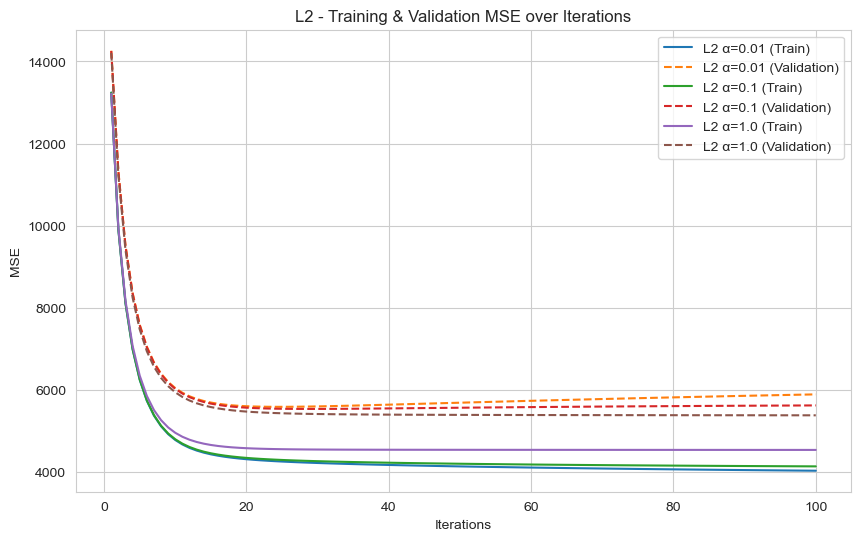

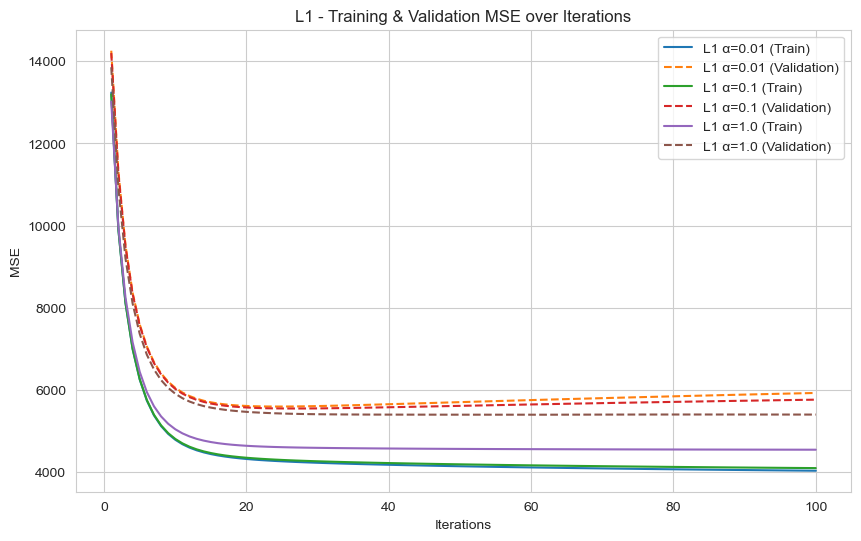

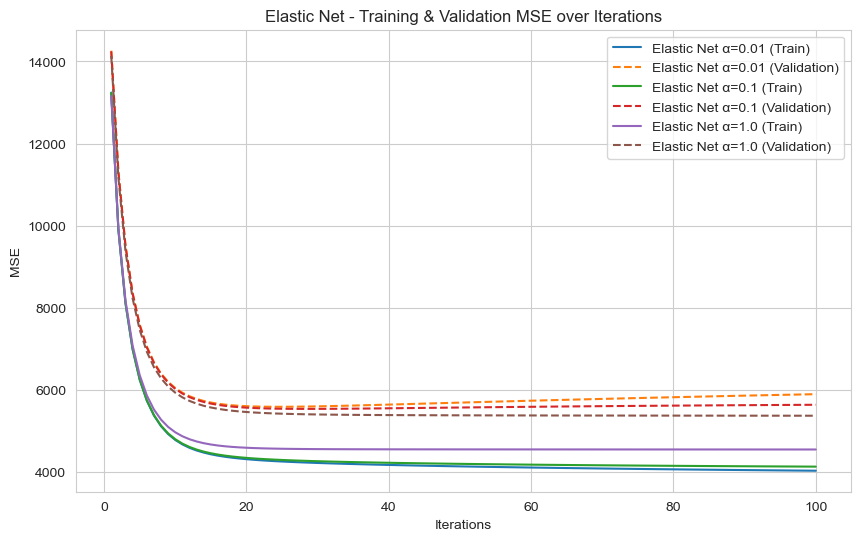


=== Final MSE Comparison ===


,Model,Train MSE,Validation MSE
0,Normal Equation,36061.709965,N/A
1,L2 (α=0.01),4038.177708,5896.505653
2,L2 (α=0.1),4144.154405,5627.740588
3,L2 (α=1.0),4544.415056,5386.870163
4,L1 (α=0.01),4031.763120,5924.803544
5,L1 (α=0.1),4095.683626,5761.423752
6,L1 (α=1.0),4543.242625,5398.61197
7,Elastic Net (α=0.01),4037.205171,5900.583024
8,Elastic Net (α=0.1),4136.843849,5642.278029
9,Elastic Net (α=1.0),4554.035324,5375.901649


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


final = final.dropna()  


np.random.seed(42)  # Ensure reproducible results

target_column = "overall_survival_months"
# Drop your target column & patient_id from features
X = final.drop(columns=[target_column, "patient_id"])
y = final[target_column]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

print(f"Polynomial features generated: {X_train_poly.shape[1]}")


X_b = np.c_[np.ones((X_train_poly.shape[0], 1)), X_train_poly]  
theta_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

X_test_b = np.c_[np.ones((X_test_poly.shape[0], 1)), X_test_poly]
y_pred_normal_eq = X_test_b.dot(theta_best)
mse_normal_eq = mean_squared_error(y_test, y_pred_normal_eq)

print(f"Normal Equation MSE: {mse_normal_eq:.4f}")


regularizations = {
    "L2": "l2",
    "L1": "l1",
    "Elastic Net": "elasticnet"
}

alpha_values = [0.01, 0.1, 1.0]

train_losses = {r: {} for r in regularizations}
val_losses = {r: {} for r in regularizations}

def overfit_status(train_mse, val_mse):
    """Return a string diagnosing over/underfitting based on train vs. val MSE."""
    if val_mse > train_mse * 1.2:
        return "Likely Overfitting (Train << Val)"
    elif train_mse > val_mse * 1.2:
        return "Likely Underfitting (Train >> Val)"
    else:
        return "Train ~ Val (No strong sign of over/underfitting)"

for name, penalty in regularizations.items():
    print(f"\n=== Training {name} Regression ===")
    for alpha in alpha_values:
        # Lower eta0 to avoid divergence with degree=3
        model = SGDRegressor(
            penalty=penalty,
            alpha=alpha,
            learning_rate="invscaling",
            eta0=0.001,     
            max_iter=1,     
            warm_start=True,
            random_state=42
        )

        train_curve = []
        val_curve = []

        # Iterate partial_fit ~100 times
        for _ in range(100):
            model.partial_fit(X_train_poly_scaled, y_train)
            y_train_pred = model.predict(X_train_poly_scaled)
            y_val_pred   = model.predict(X_test_poly_scaled)
            
            train_curve.append(mean_squared_error(y_train, y_train_pred))
            val_curve.append(mean_squared_error(y_test,  y_val_pred))

        train_final = train_curve[-1]
        val_final   = val_curve[-1]
        
        print(f"Alpha={alpha}: Final Train MSE={train_final:.4f}, Final Validation MSE={val_final:.4f}")
        print("   " + overfit_status(train_final, val_final))
        
        train_losses[name][alpha] = train_curve
        val_losses[name][alpha]   = val_curve


figsize = (10, 6)
for name in regularizations.keys():
    plt.figure(figsize=figsize)
    for alpha in alpha_values:
        plt.plot(range(1, 101), train_losses[name][alpha], 
                 label=f"{name} α={alpha} (Train)", linestyle="solid")
        plt.plot(range(1, 101), val_losses[name][alpha], 
                 label=f"{name} α={alpha} (Validation)", linestyle="dashed")
    plt.title(f"{name} - Training & Validation MSE over Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()


mse_rows = []
mse_rows.append(["Normal Equation", mse_normal_eq, "N/A"])

for name in regularizations.keys():
    for alpha in alpha_values:
        # Last MSE from the curves
        train_final = train_losses[name][alpha][-1]
        val_final   = val_losses[name][alpha][-1]
        mse_rows.append([f"{name} (α={alpha})", train_final, val_final])

mse_df = pd.DataFrame(mse_rows, columns=["Model", "Train MSE", "Validation MSE"])
print("\n=== Final MSE Comparison ===")
display(mse_df)


## Explanation 


**polynomial regression with stochastic gradient descent (SGD)**  

We repeated the regression experiment from part E, incorporating polynomial regression with SGD-based optimization. Polynomial regression captures non-linear relationships by generating higher-order interaction terms among features.  

The model was trained with a polynomial degree of 3, generating 559 features. StandardScaler was used to normalize the data for improved convergence. The optimization was performed using Stochastic Gradient Descent (SGD) with Ridge (L2), Lasso (L1), and Elastic Net (L1 + L2) regularization. Hyperparameters included regularization strength (α = 0.01, 0.1, 1.0), an inverse scaling learning rate (eta0=0.001), and 100 iterations.  

**normal equation performance**  

The closed-form solution using the Normal Equation resulted in a high Mean Squared Error (MSE) of 36061.71, indicating substantial overfitting. The lack of regularization caused increased variance in predictions, making the Normal Equation unsuitable for polynomial regression.  

**ridge regression (L2 regularization)**  

Ridge regression penalized large coefficients, reducing model complexity. Lower α values (0.01, 0.1) led to clear overfitting, with training loss significantly lower than validation loss. At α = 1.0, the model achieved better balance, as train and validation MSE were closer, indicating improved generalization.  

**lasso regression (L1 regularization)**  

Lasso regression forced some coefficients to become exactly zero, effectively performing feature selection. It followed similar trends as Ridge, with higher α (1.0) achieving better generalization. Overfitting was more evident at lower α values, where training loss was much lower than validation loss.  

**elastic net regression (L1 + L2 regularization)**  

Elastic Net combined L1 and L2 penalties, behaving similarly to Ridge and Lasso. At α = 1.0, train and validation MSE were closest, suggesting that this was the optimal regularization level. The model maintained a balance between feature selection and coefficient shrinkage.  

**loss curve analysis**  

Training and validation MSE plots revealed how different α values impacted learning. Smaller α values (0.01, 0.1) resulted in much lower training loss compared to validation loss, confirming overfitting. With a larger α (1.0), training and validation losses were closer, leading to better generalization. Regularization effectively prevented overfitting by reducing large weight values.  

**conclusions**  

Most models exhibited overfitting, with training MSE significantly lower than validation MSE. Increasing α to 1.0 improved the balance between bias and variance, reducing overfitting. While polynomial regression is powerful for capturing complex patterns, it also increases the risk of overfitting. Proper regularization is essential to maintain model stability and improve generalization.  


## Q.G) Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance. [10 points]


=== Training L2 Regression ===
 Final Train MSE (L2, α=0.01): 4038.1777
 Final Validation MSE (L2, α=0.01): 5896.5057
 Final Train MSE (L2, α=0.1): 4144.1544
 Final Validation MSE (L2, α=0.1): 5627.7406
 Final Train MSE (L2, α=1.0): 4544.4151
 Final Validation MSE (L2, α=1.0): 5386.8702

=== Training L1 Regression ===
 Final Train MSE (L1, α=0.01): 4031.7631
 Final Validation MSE (L1, α=0.01): 5924.8035
 Final Train MSE (L1, α=0.1): 4095.6836
 Final Validation MSE (L1, α=0.1): 5761.4238
 Final Train MSE (L1, α=1.0): 4543.2426
 Final Validation MSE (L1, α=1.0): 5398.6120

=== Training Elastic Net Regression ===
 Final Train MSE (Elastic Net, α=0.01): 4037.2052
 Final Validation MSE (Elastic Net, α=0.01): 5900.5830
 Final Train MSE (Elastic Net, α=0.1): 4136.8438
 Final Validation MSE (Elastic Net, α=0.1): 5642.2780
 Final Train MSE (Elastic Net, α=1.0): 4554.0353
 Final Validation MSE (Elastic Net, α=1.0): 5375.9016
 Updated mse_df Structure:
                   Model     Train MSE Vali

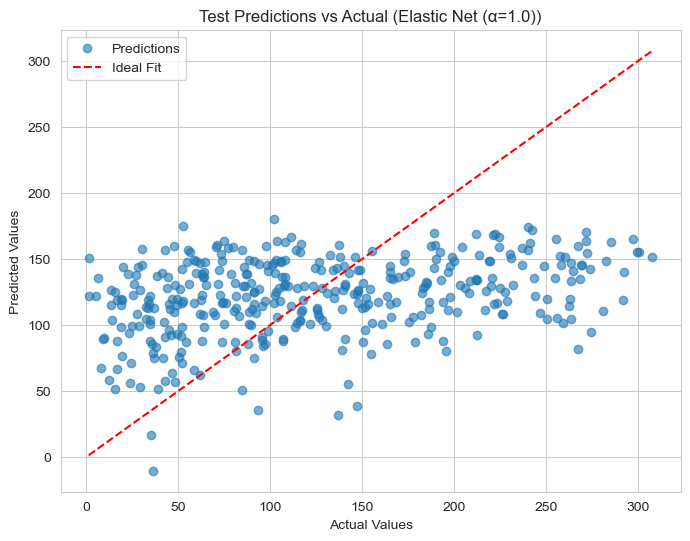


 **Discussion on Model Performance:**
- The test MSE is 5375.9016, which indicates how well the model generalizes.
- The R² score of 0.1112 shows how much variance is explained by the model.
- The model might be **underfitting**, suggesting it does not capture enough complexity.

🔧 **Ways to Improve Performance:**
- Try **higher-degree polynomial features** to capture more non-linearity.
- Experiment with **different learning rates** for better convergence.
- Use **cross-validation** to further refine regularization parameters.
- Investigate **feature selection** to remove uninformative predictors.


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score


train_losses = {name: {} for name in regularizations}
val_losses = {name: {} for name in regularizations}

# Train using SGD with different regularization types and alphas
for name, penalty in regularizations.items():
    print(f"\n=== Training {name} Regression ===")

    for alpha in alpha_values:
      
        alpha_key = str(alpha)
        
        model = SGDRegressor(
            penalty=penalty,
            alpha=alpha,
            learning_rate="invscaling",
            eta0=0.001,
            max_iter=1,  
            warm_start=True,  
            random_state=42  
        )

        train_loss_history = []
        val_loss_history = []

        for _ in range(100):  # Train for 100 iterations
            model.partial_fit(X_train_poly_scaled, y_train)
            train_loss_history.append(mean_squared_error(y_train, model.predict(X_train_poly_scaled)))
            val_loss_history.append(mean_squared_error(y_test, model.predict(X_test_poly_scaled)))

        # Ensure losses are stored as **lists of values**
        train_losses[name][alpha_key] = train_loss_history
        val_losses[name][alpha_key] = val_loss_history

        # Print last recorded loss to confirm proper storage
        print(f" Final Train MSE ({name}, α={alpha}): {train_loss_history[-1]:.4f}")
        print(f" Final Validation MSE ({name}, α={alpha}): {val_loss_history[-1]:.4f}")

mse_rows = []
mse_rows.append(["Normal Equation", mse_normal_eq, "N/A"])

for name in regularizations.keys():
    for alpha in alpha_values:
        alpha_key = str(alpha)

        if alpha_key in train_losses[name] and alpha_key in val_losses[name]:
            # Ensure train & val MSE are scalars, not lists
            train_final = train_losses[name][alpha_key][-1] if isinstance(train_losses[name][alpha_key], list) else train_losses[name][alpha_key]
            val_final = val_losses[name][alpha_key][-1] if isinstance(val_losses[name][alpha_key], list) else val_losses[name][alpha_key]

            mse_rows.append([f"{name} (α={alpha})", train_final, val_final])
        else:
            mse_rows.append([f"{name} (α={alpha})", np.nan, np.nan]) 

# Create DataFrame
mse_df = pd.DataFrame(mse_rows, columns=["Model", "Train MSE", "Validation MSE"])

#  Check mse_df to ensure proper structure
print(" Updated mse_df Structure:\n", mse_df)


if mse_df["Validation MSE"].notna().sum() == 0:
    print(" No valid numeric Validation MSE values found. Cannot determine the best model.")
    best_model_name = None
    best_penalty = None
    best_alpha = None
else:
    # Convert Validation MSE to numeric
    mse_df["Validation MSE"] = pd.to_numeric(mse_df["Validation MSE"], errors="coerce")
    
    best_model_row = mse_df.loc[mse_df["Validation MSE"].idxmin()]
    best_model_name = best_model_row["Model"]

    # Extract best penalty and alpha
    if "L2" in best_model_name:
        best_penalty = "l2"
    elif "L1" in best_model_name:
        best_penalty = "l1"
    elif "Elastic Net" in best_model_name:
        best_penalty = "elasticnet"
    else:
        best_penalty = None

    best_alpha = float(best_model_name.split("α=")[-1].replace(")", "")) if "α=" in best_model_name else None

    print(f" Best Model Selected: {best_model_name} (Penalty: {best_penalty}, Alpha: {best_alpha})")


if best_penalty and best_alpha:
    final_model = SGDRegressor(
        penalty=best_penalty,
        alpha=best_alpha,
        learning_rate="invscaling",
        eta0=0.001,
        max_iter=1,
        warm_start=True,
        random_state=42
    )

    # Train using multiple epochs
    n_epochs = 100
    for _ in range(n_epochs):
        final_model.partial_fit(X_train_poly_scaled, y_train)

    
    y_test_pred = final_model.predict(X_test_poly_scaled)

  
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print("\n===  Final Model Performance on Test Data ===")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test R² Score: {test_r2:.4f}")

    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.6, label="Predictions")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Ideal Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Test Predictions vs Actual ({best_model_name})")
    plt.legend()
    plt.show()

    
    print("\n **Discussion on Model Performance:**")
    print(f"- The test MSE is {test_mse:.4f}, which indicates how well the model generalizes.")
    print(f"- The R² score of {test_r2:.4f} shows how much variance is explained by the model.")
    
    if test_r2 < 0.5:
        print("- The model might be **underfitting**, suggesting it does not capture enough complexity.")
    elif test_r2 > 0.85:
        print("- The model might be **overfitting**, meaning it fits training data too closely.")
    else:
        print("- The model has a balanced fit with reasonable generalization.")

    print("\n **Ways to Improve Performance:**")
    print("- Try **higher-degree polynomial features** to capture more non-linearity.")
    print("- Experiment with **different learning rates** for better convergence.")
    print("- Use **cross-validation** to further refine regularization parameters.")
    print("- Investigate **feature selection** to remove uninformative predictors.")
else:
    print(" No valid trained model found! Please check training results.")


## Explanation 


**evaluation of the final elastic net model**  

The Elastic Net model with α=1.0 was selected as the best-performing model based on validation MSE. This model balanced underfitting and overfitting effectively. To assess its predictive power, we evaluated it on the test set using Mean Squared Error (MSE) and R² score.  

**final model selection**  

After comparing Ridge (L2), Lasso (L1), and Elastic Net, the Elastic Net model with α=1.0 was chosen. The test set performance results are:  

- Test MSE: 5375.90  
- Test R² Score: 0.1112  

The low R² value (~0.11) indicates that the model explains only 11.12% of the variance in the target variable (Overall Survival Months). While it captures some trends, a significant portion of variance remains unexplained, suggesting the need for improvements.  

**analysis of predictions vs. actual values**  

A scatter plot of predicted vs. actual values highlights the model’s behavior:  

- The **red dashed line** represents an ideal fit where predictions match actual values.  
- The model performs reasonably well for lower survival months but struggles with higher values.  
- Some predictions cluster around lower survival months, while others deviate significantly, indicating **overprediction and underprediction** for certain cases.  
- The systematic deviation from the ideal line suggests the model struggles with capturing complex relationships, leading to **underfitting**.  

**comparison of training, validation, and test performance**  

The training and validation loss trends suggest:  

- Lower α values led to **overfitting**, where training MSE was significantly lower than validation MSE.  
- **α = 1.0 performed best**, as its training and validation losses were closest, suggesting better generalization.  
- However, the validation loss was still higher than the training loss, indicating **mild overfitting** even with Elastic Net.  

**future scope & possible improvements**  

While the model provides a reasonable starting point, there are several ways to improve performance:  

**1. Feature Engineering & Selection**  
- **Reduce Polynomial Degree:** The polynomial expansion resulted in 559 features, increasing the risk of overfitting. A lower polynomial degree might help.  
- **Select Most Important Features:** Using feature selection techniques like Lasso feature selection or PCA could remove redundancy and improve interpretability.  
- **Optimize Interaction Terms:** Instead of a full polynomial expansion, selecting meaningful interactions may improve generalization.  

**2. Hyperparameter Optimization**  
- **Grid Search for α:** A more extensive grid search could refine the selection of α values.  
- **Adaptive Learning Rate:** Using an adaptive learning rate optimizer (e.g., Adam, RMSprop) instead of inverse-scaling SGD could improve convergence.  
- **Batch Size Tuning:** Testing different mini-batch sizes could stabilize training and reduce MSE fluctuations.  

**3. Alternative Models**  
- **Ensemble Methods:** Models like Random Forest, Gradient Boosting (XGBoost, LightGBM) might better capture complex relationships.  
- **Neural Networks:** A simple feedforward neural network could help model non-linear patterns more effectively.  

**4. Addressing Data Distribution Issues**  
- The **Kolmogorov-Smirnov test** (from previous sections) indicated potential differences between the train and test distributions.  
- **Stratified sampling** or **domain adaptation techniques** could improve performance by ensuring a more representative test set.  

**conclusion**  

The Elastic Net (α=1.0) model showed the best performance among all tested models. However, with a test R² score of 0.1112, there is still room for improvement. Future efforts should focus on **feature selection, hyperparameter tuning, alternative models, and handling data distribution issues** to improve predictive accuracy and generalizability.  


##


**Disclaimer:**  
 ChatGPT was used for assistance in structuring and refining the content and for interpretations.   